Previous Blog!, we learnt how simple linear regression (SISO) works but we still haven't wrapped our heads around the part, how error is minimized 🤔🤔🤔🤔. We present a very important concept of error minimization with GRADIENT DESCENT in this blog.

you will learn about:
1. visualization of concept of Loss and Loss function(Mean Squared Error)
2. Gradient Descent for loss optimization.

As we saw in previous blogs, methods to use for fitting a line:
1. the line can be fit by estimation of *𝛽's* (mostly likely used)
2. by simply fitting random lines and trying to minimize the error.

Well we use 2nd method to develop our understanding of loss minimization in linear regression. 

# visualization of concept of Loss and Loss function(Mean Squared Error)

first let me make a point , we have 2 steps here:
1. we are learning to visualize and see how loss function looks like. 
2. The next step would be to see how we minimize it.

### Step 1

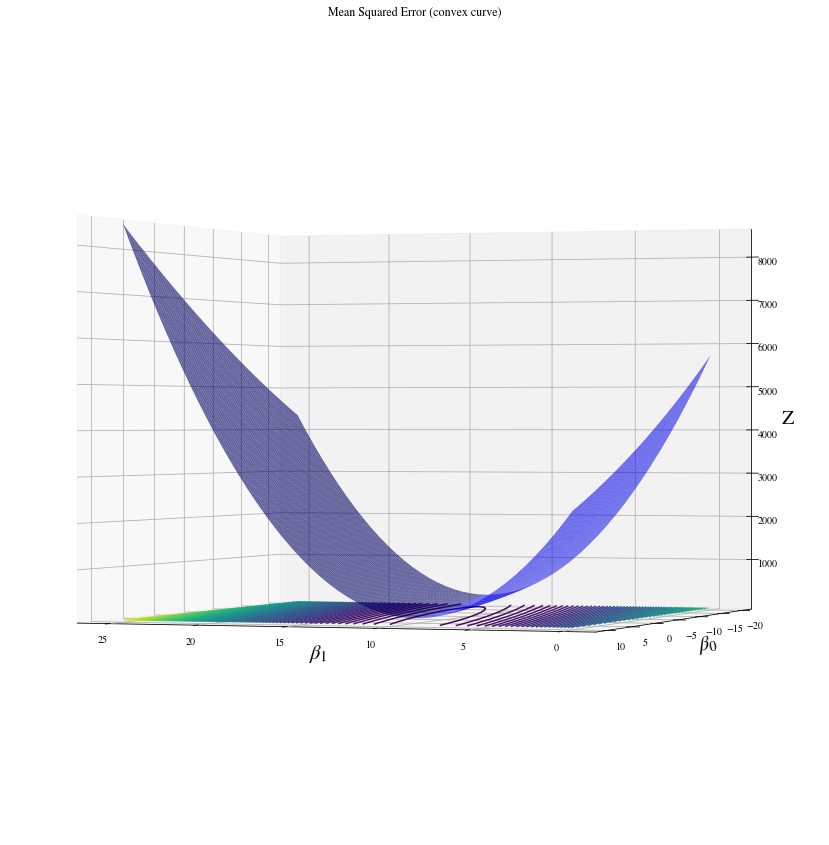

In [4]:
# the details of code should be skipped for now!
# but we can majorly focus on the graph.

%matplotlib inline
import numpy as np
import matplotlib
# %matplotlib qt
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

matplotlib.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
    })

# reading dataset
df = pd.read_csv('datasets/student_scores.csv', delimiter =',')
x = df['Hours'].values
y = df['Scores'].values

#axes for beta's
b1Grid = np.linspace(0,25)
b0Grid = np.linspace(-20,10)

def error_function(x,y,b0,b1,e=0):
    '''
    we iterate over target values (y) 
    and calculate error in each iteration.
    '''
    
    for i,yi in enumerate(y):
        e += np.square((b1*x[i]+b0) - yi) # error squaring 
    return e/len(y) # taking mean of 'e' we get MEAN SQUARED ERROR....

# getting matrices of beta
bv, mv = np.meshgrid(b0Grid, b1Grid)
z = error_function(x,y,bv,mv)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(mv, bv, z, color='b', alpha=0.6)
ax.contour(mv, bv, z, 100, offset =-100)
ax.set_xlabel(r'$\beta_1$',size=20)
ax.set_ylabel(r'$\beta_0$',size=20)
plt.scatter
plt.title('Mean Squared Error (convex curve)')
ax.set_zlabel('Z',size=20)
ax.view_init(elev=0, azim=110)
plt.show()

In [2]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=True)
reg.fit(df[['Hours']], df['Scores'])  #single column input and output

b1 =  reg.coef_[0]
b0 = reg.intercept_
print(f'The values for b1 and b0 are: {np.round(b1,2)} and {np.round(b0,2)} respectively.')

The values for b1 and b0 are: 9.78 and 2.48 respectively.


## Where do the best values for $\beta_1$ and $\beta_0$ fall in the error function?
The values of β1 and β0 fall at the lowest point of the error function.

### Step 2


The following Squared _error function_ is **convex**/**bowl**/parabolic shape:
$$ \epsilon = \frac{1}{n} \sum_{i=1}^n ((\beta_1x_i +\beta_0)-y_i)^2.$$

From the mathematics we learn in high school we know, to MINIMIZE a function we take DERIVATIVES of it. To minimize error we take derivatives w.r.t beta's.

The partial derivatives w.r.t $\beta_1$ and $\beta_0$ are:
$$ 
\frac{\partial \epsilon}{\partial \beta_1} = \frac{2}{n}\sum_{i=1}^n ((\beta_1x_i +\beta_0)-y_i)x_i,
$$

$$ 
\frac{\partial \epsilon}{\partial \beta_0} = \frac{2}{n}\sum_{i=1}^n ((\beta_1x_i +\beta_0)-y_i).
$$

Algorithm:  
$\quad$ Initialize:  
$\quad$$\quad$ Start with random $\beta_1$ and $\beta_0$ values, say $\beta_1^{old}$ and $\beta_0^{old}$.  
$\quad$$\quad$ Calculate $\epsilon^{old}$  
$\quad$ repeat {  
$\quad$$\quad$ Update:  
$\quad$$\quad$$\quad$ $ \beta_1^{new} = \beta_1^{old} - \lambda \frac{2}{n}\sum_{i=1}^n ((\beta_1^{old} x_i +\beta_0^{old})-y_i)x_i$  
$\quad$$\quad$$\quad$ $ \beta_0^{new} = \beta_0^{old} - \lambda \frac{2}{n}\sum_{i=1}^n ((\beta_1^{old} x_i +\beta_0^{old})-y_i)$  
$\quad$$\quad$$\quad$ Calculate $\epsilon^{new}$  
$\quad$ } until ($\epsilon^{new}$ >= $\epsilon^{old}$)


In the above algorithm $\lambda>0$ is step size, and is usually selected as a small number. Here we do not have to consider the second order information because the function is convex.

In [3]:
# Implementation of gradient descent method as described above 

def error_function(x,y,b0,b1):
    e=0
    for i,yi in enumerate(y):
        e += ((b1*x[i]+b0) - yi)**2
    return e/len(y)

def partial_b1(x,y,b0,b1):
    e=0
    for i,yi in enumerate(y):
        e += ((b1*x[i]+b0) - yi)*x[i]
    return 2*e/len(y)

def partial_b0(x,y,b0,b1):
    e=0
    for i,yi in enumerate(y):
        e += ((b1*x[i]+b0) - yi)
    return 2*e/len(y)

# reading dataset 

df = pd.read_csv('datasets/student_scores.csv', delimiter =',')
x = df['Hours'].values
y = df['Scores'].values

#initialize
b1_Old = 10
b0_Old = 10
mse_Old = error_function(x,y,b0_Old,b1_Old) 
lam = 0.005
print('Initial Values:', b0_Old, b1_Old, mse_Old,'\n')

##start loop 
while True:
    b1_New = b1_Old - lam * partial_b1(x,y,b0_Old,b1_Old)
    b0_New = b0_Old - lam * partial_b0(x,y,b0_Old,b1_Old)
    mse_New = error_function(x,y,b0_New,b1_New)
    if mse_New >= mse_Old:
        b0_New,b1_New,mse_New = b0_Old,b1_Old,mse_Old
        break
    else:
        b0_Old,b1_Old,mse_Old = b0_New,b1_New,mse_New  
      
print('Final values:', b0_New, b1_New, mse_New)

Initial Values: 10 10 103.84 

Final values: 2.4836792008720807 9.775802455301555 28.882730509252028


voila! maybe you didn't had a proper understanding of gradient descent till now!! but i hope after reading our blog, you can connect dots and finally be able to relate to it. 

why are we using gradient descent??? isn't the iterative estimation process good enough for regression model??

hmmm interesting question....

To that i shall reply.
The graph you saw, is for SINGLE INPUT & SINGLE TARGET VARIABLE, 

lets take a small step and add a few more variable.

### FOR MULTIPLE INPUTS
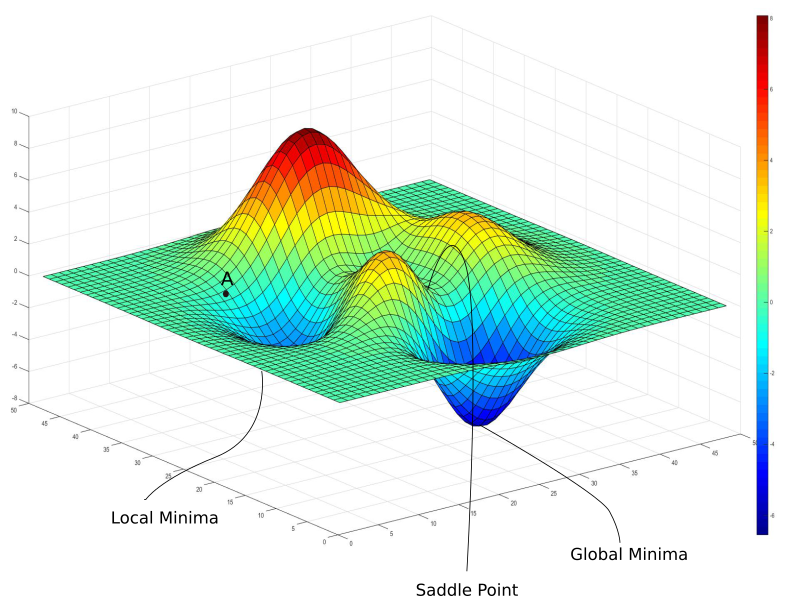!

**The graph may look more complex, hence you should use GRADIENT DESCENT for easy calculation of $\beta$**

that is it for today guys, tomorrow we will learn to perform MULTIPLE LINEAR REGRESSION and develop an INTUITION behind it.